<a href="https://colab.research.google.com/github/harabou/NCD_biostat/blob/main/%2306_3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning

In [ ]:
import time

import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline
import shap
shap.initjs()

X, y = shap.datasets.diabetes()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train, 10)


def print_accuracy(f):
    print(f"Root mean squared test error = {np.sqrt(np.mean((f(X_test) - y_test) ** 2))}")
    time.sleep(0.5)  # to let the print get out before any progress bars


shap.initjs()

age: Age in years
sex: Gender of the patient
bmi: Body mass index
bp: Average blood pressure
s1: Total serum cholesterol (tc)
s2: Low-density lipoproteins (ldl)
s3: High-density lipoproteins (hdl)
s4: Total cholesterol / HDL (tch)
s5: Possibly log of serum triglycerides level (ltg)
s6: Blood sugar level (glu)

In [ ]:
from sklearn import linear_model

lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

print_accuracy(lin_regr.predict)

Root mean squared test error = 58.51717127731562


In [ ]:
shap.initjs(),
ex = shap.KernelExplainer(lin_regr.predict, X_train_summary)
shap_values = ex.shap_values(X_test.iloc[0, :])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0, :])

  0%|          | 0/89 [00:00<?, ?it/s]

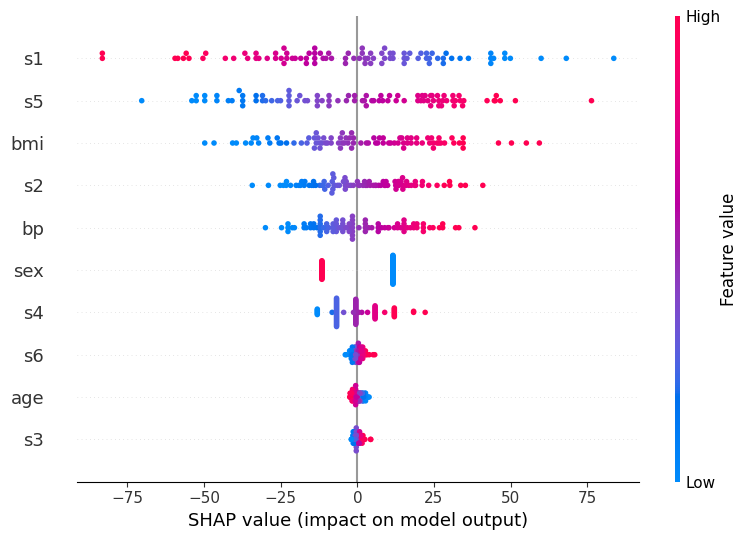

In [ ]:
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
shap.initjs(),
shap.force_plot(ex.expected_value, shap_values, X_test)


Root mean squared test error = 71.23061914642545


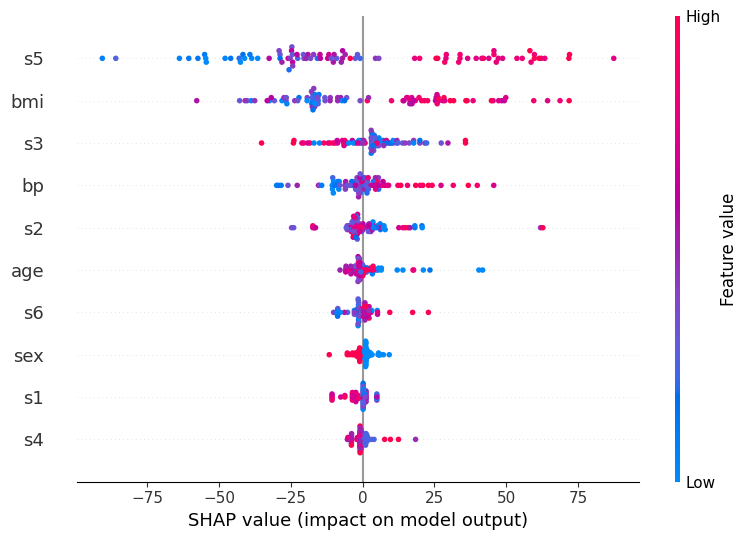

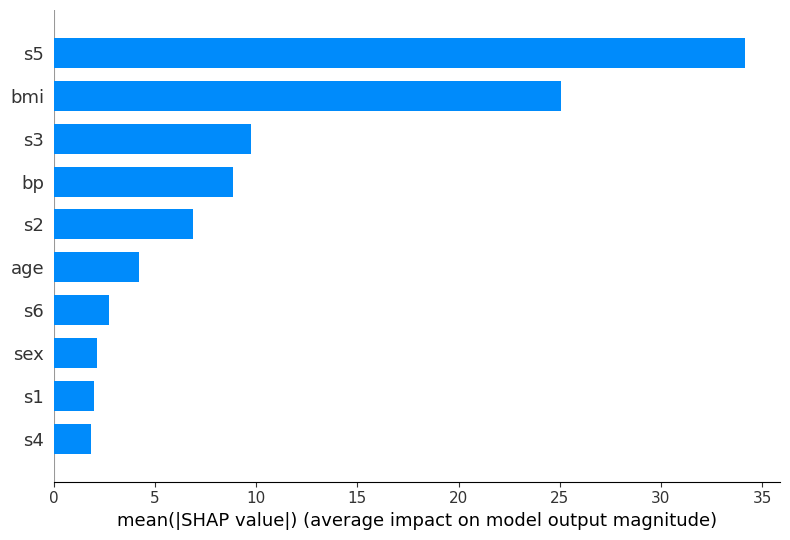

In [ ]:
#Decision tree regressor
from sklearn import tree

dtree = tree.DecisionTreeRegressor(min_samples_split=20)
dtree.fit(X_train, y_train)
print_accuracy(dtree.predict)

# explain all the predictions in the test set
ex = shap.TreeExplainer(dtree)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X, plot_type="bar")

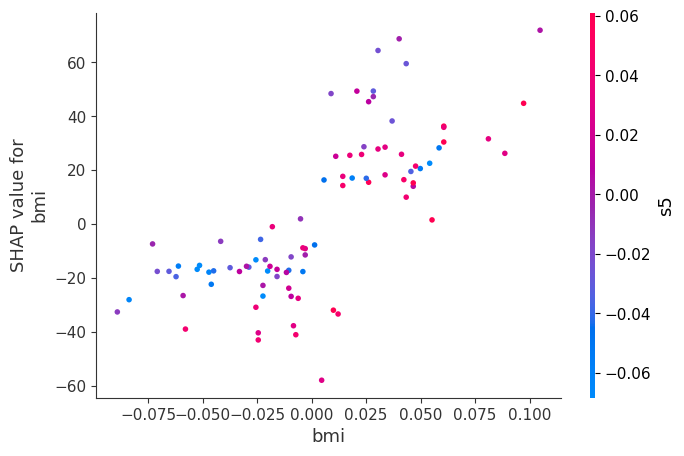

In [ ]:

shap.dependence_plot(ind="bmi", shap_values=shap_values, features=X_test) # Changed X to X_test to match shap_values

In [ ]:
shap.initjs(),
shap.force_plot(ex.expected_value, shap_values, X_test)

In [ ]:
shap.initjs(),
ex = shap.KernelExplainer(dtree.predict, X_train_summary)
shap_values = ex.shap_values(X_test.iloc[0, :])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0, :])

Root mean squared test error = 61.16592960743402


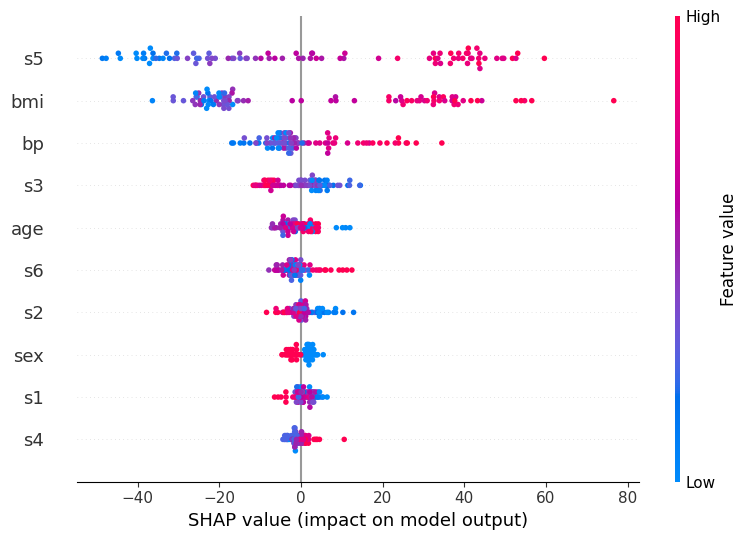

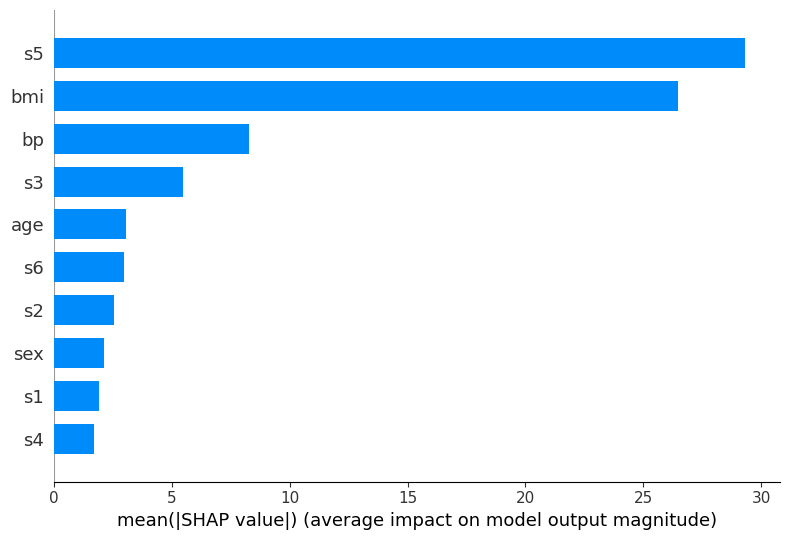

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

# explain all the predictions in the test set
explainer = shap.TreeExplainer(rforest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X, plot_type="bar")

In [ ]:
shap.initjs(),
shap.force_plot(explainer.expected_value, shap_values, X_test)

In [ ]:
shap.plots.waterfall(shap_values[sample_idx])

In [ ]:
shap.initjs(),
ex = shap.KernelExplainer(rforest.predict, X_train_summary)
shap_values = ex.shap_values(X_test.iloc[0, :])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0, :])

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Root mean squared test error = 58.23227982956135


  0%|          | 0/89 [00:00<?, ?it/s]

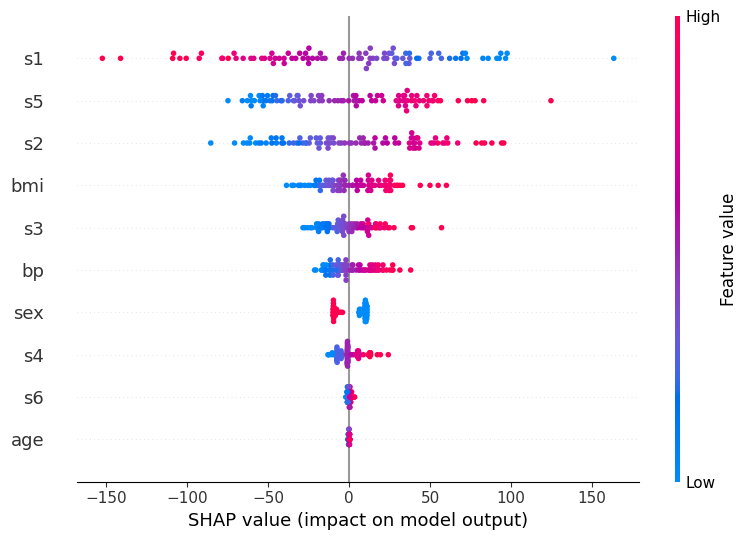

In [ ]:
#Neural network
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(solver="lbfgs", alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)
nn.fit(X_train, y_train)
print_accuracy(nn.predict)

# explain all the predictions in the test set
explainer = shap.KernelExplainer(nn.predict, X_train_summary)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

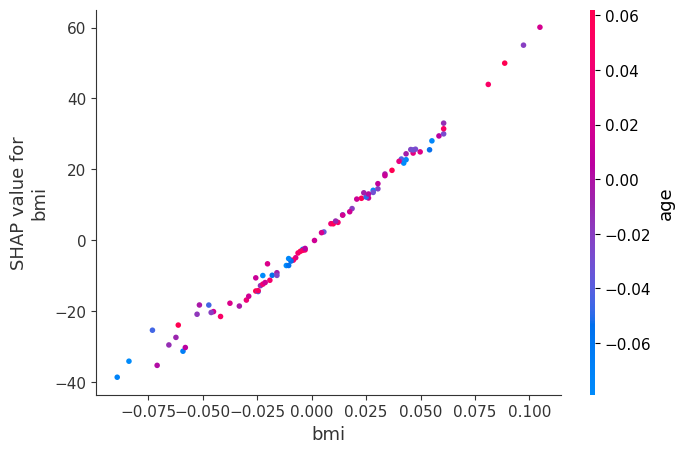

In [ ]:
shap.dependence_plot(ind="bmi", shap_values=shap_values, features=X_test) # Changed X to X_test to match shap_values

In [ ]:
shap.initjs(),
shap.force_plot(explainer.expected_value, shap_values, X_test)


In [ ]:
shap.initjs(),
ex = shap.KernelExplainer(nn.predict, X_train_summary)
shap_values = ex.shap_values(X_test.iloc[0, :])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0, :])

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
   target
0   151.0
1    75.0
2   141.0
3   206.0
4   135.0


<Axes: >

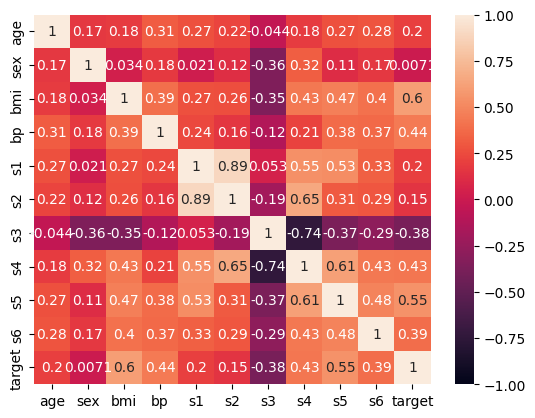

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_diabetes

#sklearnからデータセットを読み込み変数に格納します。
diabetes = load_diabetes()
#データをPandasのデータフレームに格納します。
X = pd.DataFrame(diabetes["data"],columns=diabetes["feature_names"])
Y = pd.DataFrame(diabetes["target"],columns=["target"])

#データの中身を確認
print(X.head(5))
print(Y.head(5))

# テストデータとトレーニングデータに分割します。
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

train = pd.concat([X_train,y_train],axis=1,sort=False)
sns.heatmap(train.corr(),vmax=1,vmin=-1,annot=True)

In [ ]:
#比較用変数
max_score = 0
best_model = ""
#線形回帰
model1 = LinearRegression()
model1.fit(X_train, y_train)
score = model1.score(X_test, y_test)
if max_score < score:
    max_score = score
    best_model = "線形回帰"

#ラッソ回帰
model2 = Lasso()
model2.fit(X_train, y_train)
score = model2.score(X_test, y_test)
if max_score < score:
    max_score = score
    best_model = "ラッソ回帰"
#リッジ回帰
model3 = Ridge()
model3.fit(X_train, y_train)
score = model3.score(X_test, y_test)
if max_score < score:
    max_score = score
    best_model = "リッジ回帰"

#ElasticNet回帰
model4 = ElasticNet(l1_ratio=0.7)
model4.fit(X_train,y_train)
score = model4.score(X_test, y_test)
if max_score < score:
    max_score = score
    best_model = "ElasticNet回帰"

print("モデル:{}".format(best_model))
print("決定係数:{}".format(max_score))

モデル:線形回帰
決定係数:0.4526027629719195


In [ ]:
import xgboost
import shap
import warnings

#warnings.filterwarnings('ignore')
#Read Features and Target of dataset
X, y = shap.datasets.diabetes()

#Train XGBoost Model
model = xgboost.XGBRegressor().fit(X, y)

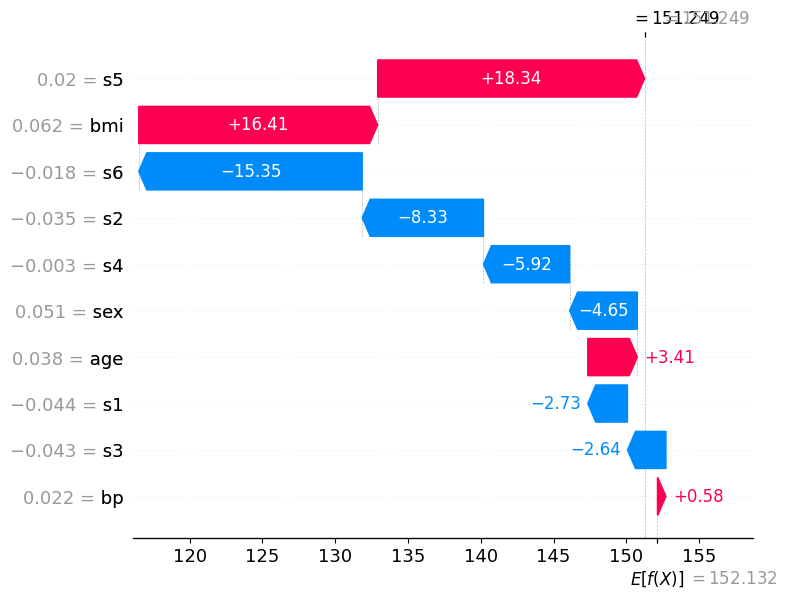

In [ ]:
#Explain the model's predictions using SHAP¶
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

#Visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

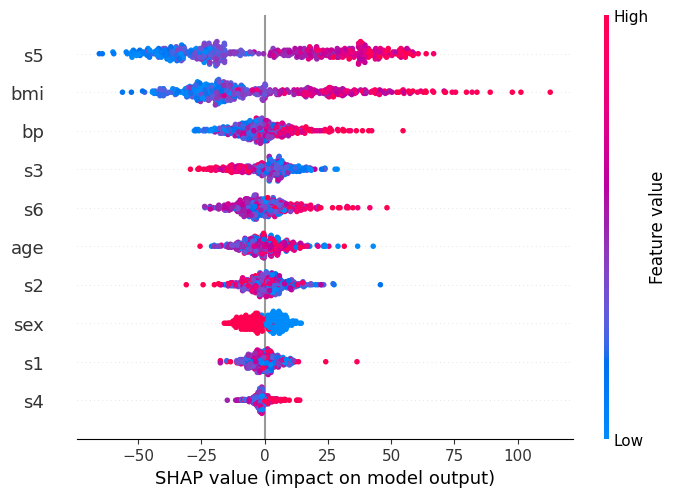

In [ ]:
#Summarize the effects of all the features¶
shap.plots.beeswarm(shap_values)

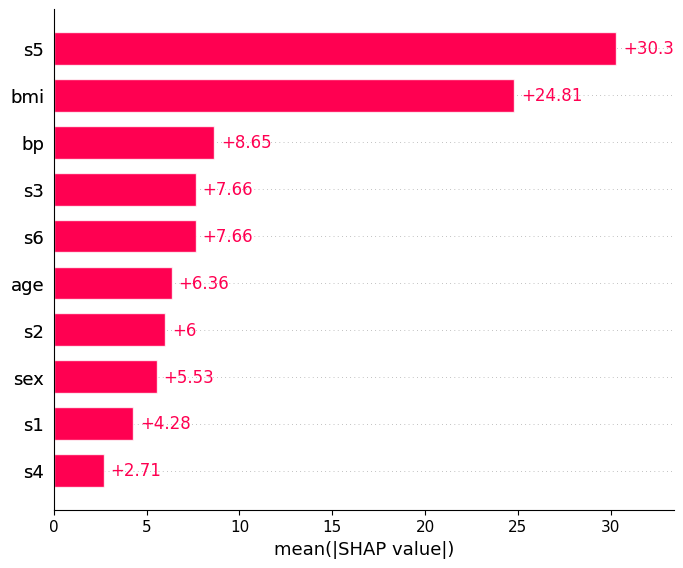

In [ ]:
shap.plots.bar(shap_values)